# SimpleMOC-kernel


---
## Parameters 
```
Compiler = icpc (ICC) 18.0.1 20171018
Build_Flags = -g -O3 -march=native -mtune=skylake -xhost 
              -ansi-alias -no-prec-div -DINTEL -qopenmp
Run_Parameters = -t [# of threads]
```

Using the defaults:
```
-s <segments> // 50,000,000
-e <energy groups> // 128
```


---
## Scaling

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

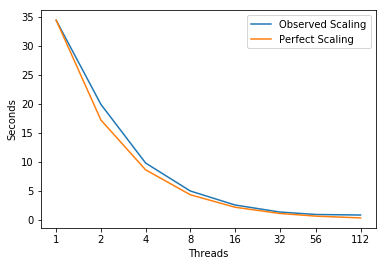

In [3]:
threads = [1, 2, 4, 8, 16, 32, 56, 112]
observedScaling = [34.4, 19.9, 9.775, 4.95, 2.5375, 1.321875, 0.8964285714285715, 0.8053571428571429]
perfectScaling = [34.4, 17.2, 8.6, 4.3, 2.15, 1.075, 0.6142857142857142, 0.3071428571428571]
fig, ax = plt.subplots(); ax.set_xscale("log", basex=2); ax.set_xticks(threads)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.plot(threads, observedScaling, label="Observed Scaling")
ax.plot(threads, perfectScaling, label="Perfect Scaling")
ax.legend(); ax.set_xlabel("Threads"); ax.set_ylabel("Seconds")
plt.show()

---
## Performance Improvement

| Threads | 2 | 4 | 8 | 16 | 32 | 56 | 112 |
|:---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| **Speed Up** | 1.73X | 2.04X | 1.97X | 1.95X | 1.92X | 1.47X | 1.11X |

---
## Cache Miss Scaling

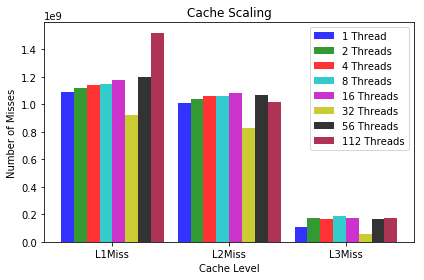

In [4]:
objects = ("L1Miss", "L2Miss", "L3Miss")
index = np.arange(len(objects)); bar_width = 0.11; opacity = 0.8

Thread1 = [1090000000.0, 1010000000.0, 111000000.0]
Thread2 = [1120000000.0, 1040000000.0, 176000000.0]
Thread4 = [1140000000.0, 1060000000.0, 163000000.0]
Thread8 = [1150000000.0, 1060000000.0, 186000000.0]
Thread16 = [1180000000.0, 1080000000.0, 173000000.0]
Thread32 = [921000000.0, 828000000.0, 53700000.0]
Thread56 = [1200000000.0, 1070000000.0, 168000000.0]
Thread112 = [1520000000.0, 1020000000.0, 176000000.0]

plt.bar(index, Thread1, bar_width, alpha=opacity, color="b", label="1 Thread")
plt.bar(index + bar_width, Thread2, bar_width, alpha=opacity, color="g", label="2 Threads")
plt.bar(index + (bar_width * 2), Thread4, bar_width, alpha=opacity, color="r", label="4 Threads")
plt.bar(index + (bar_width * 3), Thread8, bar_width, alpha=opacity, color="c", label="8 Threads")
plt.bar(index + (bar_width * 4), Thread16, bar_width, alpha=opacity, color="m", label="16 Threads")
plt.bar(index + (bar_width * 5), Thread32, bar_width, alpha=opacity, color="y", label="32 Threads")
plt.bar(index + (bar_width * 6), Thread56, bar_width, alpha=opacity, color="k", label="56 Threads")
plt.bar(index + (bar_width * 7), Thread112, bar_width, alpha=opacity, color="#9B0029", label="112 Threads")

plt.xlabel("Cache Level"); plt.ylabel("Number of Misses")
plt.xticks(index + (bar_width*3.5), objects); plt.title("Cache Scaling"); plt.legend()

plt.tight_layout()
plt.show()

---
## Hit Locations

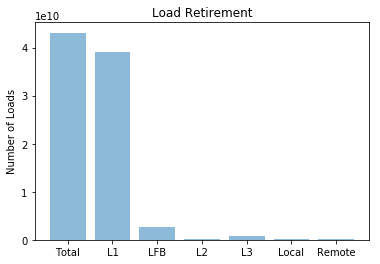

In [5]:
objects = ('Total', 'L1', 'LFB', 'L2', 'L3', 'Local', 'Remote')
y_pos = np.arange(len(objects))
measurements = [43100000000.0, 39100000000.0, 2750000000.0, 165000000.0, 829000000.0, 87756708.4079, 80243291.5921]

plt.bar(y_pos, measurements, align="center", alpha=0.5)
plt.xticks(y_pos, objects); plt.ylabel("Number of Loads"); plt.title("Load Retirement")

plt.show()

---
## FLOPS
| Single Precision | Scalar | 128B Packed | 256B Packed | 512B Packed | Total FLOPS | GFLOPS/sec |
|:---|:---:|:---:|:---:|:---:|:---:|:---:|
| PMU | 2.360e+08 | 1.700e+08 | 7.830e+10 | 5.440e+09 | 7.144e+11 | 7.969e+02 |
| SDE | 2.095e+08 | 1.500e+08 | 6.422e+10 | 4.800e+09 | 5.930e+11 | 6.604e+02 |

---
### Roofline - Intel(R) Xeon(R) Platinum 8180M CPU
#### 112 Threads - 56 - Cores 3200.0 Mhz
|     GB/sec     |  L1 B/W |  L2 B/W |  L3 B/W | DRAM B/W |
|:---------------|:-------:|:-------:|:-------:|:--------:|
|**1 Thread**    |  159.33 |  91.42 |    47.08 |    21.27|
|**56 Threads**  | 9816.2 | 5579.1 |  1050.00\* |   198.4 |
|**112 Threads** | 9912.56 | 5573.58 |  1050.00\* |   203.13  |
#### \* L3 BW ERT unable to recognize.  Very short plateau ( estimate taken from graph3 )

---
### Intel Software Development Emulator
| Intel SDE | SimpleMOC-kernel|
|:---|:---:|
| **Arithmetric Intensity** | 0.387 |
| **FLOPS per Inst** | 4.53 |
| **FLOPS per FP Inst** | 8.45 |
| **Bytes per Load Inst** | 25.5 |
| **Bytes per Store Inst** | 26.1 |

<img src="SimpleMOC-kernel.png">

---
## UOPS Executed

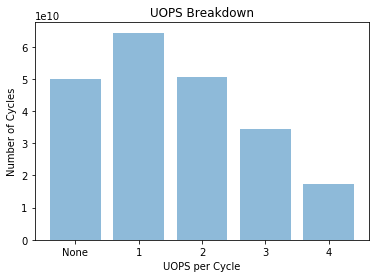

In [6]:
objects = ('None', '1', '2', '3', '4')
y_pos = np.arange(len(objects))
measurements = [50100000000.0, 64400000000.0, 50500000000.0, 34500000000.0, 17500000000.0]

plt.bar(y_pos, measurements, align="center", alpha=0.5)
plt.xticks(y_pos, objects); plt.ylabel("Number of Cycles")
plt.xlabel("UOPS per Cycle"); plt.title("UOPS Breakdown")

plt.show()

---
## `Experiment Aggregate Metrics`
|Threads (Time)| IPC per Core | Loads per Cycle | L1 Hits per Cycle |  L1 Miss Ratio | L2 Miss Ratio | L3 Miss Ratio | L2 B/W Utilized | L3 B/W Utilized |DRAM B/W Utilized| DTLB Miss Rate |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1 (100.0%)| 1.56 | 1.02 | 0.93 | 2.53% | 58.24% | 9.90% | 4.70% | 21.68% | 24.03% | 0.02% |
|56 (100.0%)| 1.37 | 0.76 | 0.69 | 2.78% | 57.69% | 16.85% | 4.19% | 27.26% | 135.73% | 0.05% |
|112 (100.0%)| 1.39 | 0.47 | 0.42 | 3.45% | 44.98% | 18.39% | 5.40% | 26.16% | 119.87% | 0.05% |

## Kernel
```c
  3 void run_kernel( Input * I, Source * S, Table * table)
  4 {
  5         // Enter Parallel Region
  6         #pragma omp parallel default(none) shared(I, S, table)
  7         {
  8                 #ifdef OPENMP
  9                 int thread = omp_get_thread_num();
                    {...}
 12                 #endif
 13 
 14                 // Create Thread Local Random Seed
 15                 unsigned int seed = time(NULL) * (thread+1);
 16 
 17                 // Allocate Thread Local SIMD Vectors (align if using intel compiler)
 18                 #ifdef INTEL
 19                 SIMD_Vectors simd_vecs = aligned_allocate_simd_vectors(I);
 20                 float * state_flux = (float *) _mm_malloc(
 21                                 I->egroups * sizeof(float), 64);
 22                 #else
 23                 SIMD_Vectors simd_vecs = allocate_simd_vectors(I);
 24                 float * state_flux = (float *) malloc(
 25                                 I->egroups * sizeof(float));
 26                 #endif
 27 
 28                 // Allocate Thread Local Flux Vector
 29                 for( int i = 0; i < I->egroups; i++ )
 30                         state_flux[i] = (float) rand_r(&seed) / RAND_MAX;
 31 
 32                 // Initialize PAPI Counters (if enabled)
 33                 #ifdef PAPI
                    {...}
 40                 #endif
 41 
 42                 // Enter OMP For Loop over Segments
 ```
|Threads (Time)| IPC per Core | Loads per Cycle | L1 Hits per Cycle |  L1 Miss Ratio | L2 Miss Ratio | L3 Miss Ratio | L2 B/W Utilized | L3 B/W Utilized |DRAM B/W Utilized| DTLB Miss Rate |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1 (99.7%)| 1.56 | 1.02 | 0.93 | 2.55% | 58.24% | 9.90% | 4.71% | 21.70% | 24.10% | 0.02% |
|56 (99.6%)| 1.36 | 0.76 | 0.69 | 2.77% | 58.54% | 16.85% | 4.17% | 27.29% | 135.94% | 0.06% |
|112 (98.8%)| 1.38 | 0.47 | 0.42 | 3.47% | 45.52% | 18.13% | 5.39% | 26.17% | 120.24% | 0.05% |
 
 ```c
 43                 #pragma omp for schedule(dynamic,100)
 44                 for( long i = 0; i < I->segments; i++ )
 45                 {
 46                         // Pick Random QSR
 47                         int QSR_id = rand_r(&seed) % I->source_3D_regions;
 48 
 49                         // Pick Random Fine Axial Interval
 50                         int FAI_id = rand_r(&seed) % I->fine_axial_intervals;
 51 
 52                         // Attenuate Segment
 53                         attenuate_segment( I, S, QSR_id, FAI_id, state_flux,
 54                                         &simd_vecs, table);
 55                 }
 56 
 57                 // Stop PAPI Counters
 58                 #ifdef PAPI
                    {...}
 71                 #endif
 72         }
 73 }
```

---
## `attenuate_segment`
```c
 75 void attenuate_segment( Input * restrict I, Source * restrict S,
 76                 int QSR_id, int FAI_id, float * restrict state_flux,
 77                 SIMD_Vectors * restrict simd_vecs, Table * restrict table)
 78 {
 79         // Unload local vector vectors
 80         float * restrict q0 =            simd_vecs->q0;
 81         float * restrict q1 =            simd_vecs->q1;
 82         float * restrict q2 =            simd_vecs->q2;
 83         float * restrict sigT =          simd_vecs->sigT;
 84         float * restrict tau =           simd_vecs->tau;
 85         float * restrict sigT2 =         simd_vecs->sigT2;
 86         float * restrict expVal =        simd_vecs->expVal;
 87         float * restrict reuse =         simd_vecs->reuse;
 88         float * restrict flux_integral = simd_vecs->flux_integral;
 89         float * restrict tally =         simd_vecs->tally;
 90         float * restrict t1 =            simd_vecs->t1;
 91         float * restrict t2 =            simd_vecs->t2;
 92         float * restrict t3 =            simd_vecs->t3;
 93         float * restrict t4 =            simd_vecs->t4;
 94 
 95         // Some placeholder constants - In the full app some of these are
 96         // calculated based off position in geometry. This treatment
 97         // shaves off a few FLOPS, but is not significant compared to the
 98         // rest of the function.
 99         const float dz = 0.1f;
100         const float zin = 0.3f;
101         const float weight = 0.5f;
102         const float mu = 0.9f;
103         const float mu2 = 0.3f;
104         const float ds = 0.7f;
105 
106         const int egroups = I->egroups;
107 
108         // load fine source region flux vector
109         float * FSR_flux = &S[QSR_id].fine_flux[FAI_id * egroups];
110 
111         if( FAI_id == 0 )
112         {
113                 float * f2 = &S[QSR_id].fine_source[FAI_id*egroups];
114                 float * f3 = &S[QSR_id].fine_source[(FAI_id+1)*egroups];
115                 // cycle over energy groups
```
## Same #ifdef repeated below several places (removed to simplify view)

```c
116                 #ifdef INTEL
117                 #pragma vector
118                 #elif defined IBM
119                 #pragma vector_level(10)
120                 #endif
121                 for( int g = 0; g < egroups; g++)
122                 {
123                         // load neighboring sources
124                         const float y2 = f2[g];
125                         const float y3 = f3[g];
126 
127                         // do linear "fitting"
128                         const float c0 = y2;
129                         const float c1 = (y3 - y2) / dz;
130 
131                         // calculate q0, q1, q2
132                         q0[g] = c0 + c1*zin;
133                         q1[g] = c1;
134                         q2[g] = 0;
135                 }
136         }
137         else if ( FAI_id == I->fine_axial_intervals - 1 )
138         {
139                 float * f1 = &S[QSR_id].fine_source[(FAI_id-1)*egroups];
140                 float * f2 = &S[QSR_id].fine_source[FAI_id*egroups];
141                 // cycle over energy groups
142                 #ifdef INTEL
                    {...}
146                 #endif
147                 for( int g = 0; g < egroups; g++)
148                 {
149                         // load neighboring sources
150                         const float y1 = f1[g];
151                         const float y2 = f2[g];
152 
153                         // do linear "fitting"
154                         const float c0 = y2;
155                         const float c1 = (y2 - y1) / dz;
156 
157                         // calculate q0, q1, q2
158                         q0[g] = c0 + c1*zin;
159                         q1[g] = c1;
160                         q2[g] = 0;
161                 }
162         }
163         else
164         {
165                 float * f1 = &S[QSR_id].fine_source[(FAI_id-1)*egroups];
166                 float * f2 = &S[QSR_id].fine_source[FAI_id*egroups];
167                 float * f3 = &S[QSR_id].fine_source[(FAI_id+1)*egroups];
168                 // cycle over energy groups
169                 #ifdef INTEL
                    {...}
173                 #endif
```

|Threads (Time)| IPC per Core | Loads per Cycle | L1 Hits per Cycle |  L1 Miss Ratio | L2 Miss Ratio | L3 Miss Ratio | L2 B/W Utilized | L3 B/W Utilized |DRAM B/W Utilized| DTLB Miss Rate |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1 (13.6%)| 0.82 | 0.31 | 0.10 | 15.49% | 59.97% | 2.39% | 11.15% | 59.93% | 66.92% | 0.04% |
|56 (8.6%)| 1.04 | 0.32 | 0.10 | 17.11% | 61.06% | 0.61% | 12.36% | 99.11% | 466.25% | 0.05% |
|112 (6.2%)| 1.42 | 0.29 | 0.12 | 14.89% | 57.29% | 0.57% | 11.75% | 84.52% | 386.46% | 0.06% |

### @NOTE: High L1 miss ratio from the indirection above(?) or from the unload local vectors at beginning of kernel

```c
174                 for( int g = 0; g < egroups; g++)
175                 {
176                         // load neighboring sources
177                         const float y1 = f1[g];
178                         const float y2 = f2[g];
179                         const float y3 = f3[g];
180 
181                         // do quadratic "fitting"
182                         const float c0 = y2;
183                         const float c1 = (y1 - y3) / (2.f*dz);
184                         const float c2 = (y1 - 2.f*y2 + y3) / (2.f*dz*dz);
185 
186                         // calculate q0, q1, q2
187                         q0[g] = c0 + c1*zin + c2*zin*zin;
188                         q1[g] = c1 + 2.f*c2*zin;
189                         q2[g] = c2;
190                 }
191         }
192 
193 
194         // cycle over energy groups
195         #ifdef INTEL
            {...}
199         #endif
```

|Threads (Time)| IPC per Core | Loads per Cycle | L1 Hits per Cycle |  L1 Miss Ratio | L2 Miss Ratio | L3 Miss Ratio | L2 B/W Utilized | L3 B/W Utilized |DRAM B/W Utilized| DTLB Miss Rate |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1 (9.7%)| 0.93 | 0.32 | 0.12 | 13.92% | 53.45% | 0.97% | 8.14% | 35.59% | 36.44% | 0.02% |
|56 (6.7%)| 1.43 | 0.37 | 0.14 | 16.70% | 47.97% | 0.19% | 7.86% | 45.59% | 220.00% | 0.16% |
|112 (4.8%)| 1.47 | 0.28 | 0.11 | 14.67% | 44.64% | 0.26% | 10.41% | 50.34% | 232.88% | 0.10% |

```c
200         for( int g = 0; g < egroups; g++)
201         {
202                 // load total cross section
203                 sigT[g] = S[QSR_id].sigT[g];
204 
205                 // calculate common values for efficiency
206                 tau[g] = sigT[g] * ds;
207                 sigT2[g] = sigT[g] * sigT[g];
208         }
209 
210         // cycle over energy groups
211         #ifdef INTEL
            {...}
215         #endif
```

|Threads (Time)| IPC per Core | Loads per Cycle | L1 Hits per Cycle |  L1 Miss Ratio | L2 Miss Ratio | L3 Miss Ratio | L2 B/W Utilized | L3 B/W Utilized |DRAM B/W Utilized| DTLB Miss Rate |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1 (27.8%)| 2.29 | 1.75 | 1.71 | 0.18% | 39.09% | 7.21% | 0.56% | 1.94% | 1.21% | 0.00% |
|56 (23.6%)| 2.34 | 1.61 | 1.60 | 0.15% | 34.48% | 0.86% | 1.55% | 5.71% | 31.22% | 0.01% |
|112 (19.5%)| 2.21 | 1.14 | 1.13 | 0.46% | 35.00% | 2.19% | 4.56% | 15.03% | 66.29% | 0.02% |

```c
216         for( int g = 0; g < egroups; g++)
217         {
218                 #ifdef TABLE
219                 expVal[g] = interpolateTable( table, tau[g] );
220                 #else
221                 expVal[g] = 1.f - expf( -tau[g] ); // exp is faster on many architectures
222                 #endif
223         }
224 
225         // Flux Integral
226 
227         // Re-used Term
228         #ifdef INTEL
            {...}
232         #endif
233         for( int g = 0; g < egroups; g++)
234         {
235                 reuse[g] = tau[g] * (tau[g] - 2.f) + 2.f * expVal[g]
236                         / (sigT[g] * sigT2[g]);
237         }
238 
239         //#pragma vector alignednontemporal
240         #ifdef INTEL
            {...}
244         #endif
245         for( int g = 0; g < egroups; g++)
246         {
247                 // add contribution to new source flux
248                 flux_integral[g] = (q0[g] * tau[g] + (sigT[g] * state_flux[g] - q0[g])
249                                 * expVal[g]) / sigT2[g] + q1[g] * mu * reuse[g] + q2[g] * mu2
250                         * (tau[g] * (tau[g] * (tau[g] - 3.f) + 6.f) - 6.f * expVal[g])
251                         / (3.f * sigT2[g] * sigT2[g]);
252         }
253 
254         #ifdef INTEL
            {...}
258         #endif
259         for( int g = 0; g < egroups; g++)
260         {
261                 // Prepare tally
262                 tally[g] = weight * flux_integral[g];
263         }
264 
265         #ifdef OPENMP
266         omp_set_lock(S[QSR_id].locks + FAI_id);
267         #endif
268 
269         #ifdef INTEL
            {...}
273         #endif
```

|Threads (Time)| IPC per Core | Loads per Cycle | L1 Hits per Cycle |  L1 Miss Ratio | L2 Miss Ratio | L3 Miss Ratio | L2 B/W Utilized | L3 B/W Utilized |DRAM B/W Utilized| DTLB Miss Rate |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1 (5.1%)| 1.40 | 1.18 | 0.95 | 6.53% | 56.80% | 31.66% | 2.55% | 14.58% | 16.32% | 0.00% |
|56 (8.3%)| 0.95 | 0.50 | 0.41 | 5.99% | 63.43% | 61.19% | 3.03% | 17.69% | 110.73% | 0.04% |
|112 (12.0%)| 1.03 | 0.24 | 0.19 | 8.23% | 52.66% | 65.38% | 4.66% | 24.82% | 133.70% | 0.05% |

```c
274         for( int g = 0; g < egroups; g++)
275         {
276                 FSR_flux[g] += tally[g];
277         }
278 
```
### Reduction in the middle of `omp` region
```c
279         #ifdef OPENMP
280         omp_unset_lock(S[QSR_id].locks + FAI_id);
281         #endif
282 
283         // Term 1
284         #ifdef INTEL
            {...}
288         #endif
```

|Threads (Time)| IPC per Core | Loads per Cycle | L1 Hits per Cycle |  L1 Miss Ratio | L2 Miss Ratio | L3 Miss Ratio | L2 B/W Utilized | L3 B/W Utilized |DRAM B/W Utilized| DTLB Miss Rate |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1 (10.0%)| 2.68 | 1.78 | 1.82 | 0.02% | 25.86% | 0.00% | 0.53% | 1.52% | 1.68% | 0.00% |
|56 (9.0%)| 2.63 | 1.58 | 1.52 | 0.18% | 20.55% | 2.27% | 2.21% | 10.17% | 61.28% | 0.01% |
|112 (7.5%)| 2.39 | 1.09 | 1.09 | 1.54% | 22.79% | 5.92% | 7.85% | 19.88% | 87.98% | 0.02% |

```c
289         for( int g = 0; g < egroups; g++)
290         {
291                 t1[g] = q0[g] * expVal[g] / sigT[g];
292         }
293         // Term 2
294         #ifdef INTEL
            {...}
298         #endif
299         for( int g = 0; g < egroups; g++)
300         {
301                 t2[g] = q1[g] * mu * (tau[g] - expVal[g]) / sigT2[g];
302         }
303         // Term 3
304         #ifdef INTEL
            {...}
308         #endif
309         for( int g = 0; g < egroups; g++)
310         {
311                 t3[g] = q2[g] * mu2 * reuse[g];
312         }
313         // Term 4
314         #ifdef INTEL
            {...}
318         #endif
319         for( int g = 0; g < egroups; g++)
320         {
321                 t4[g] = state_flux[g] * (1.f - expVal[g]);
322         }
323         // Total psi
324         #ifdef INTEL
            {...}
328         #endif
329         for( int g = 0; g < egroups; g++)
330         {
331                 state_flux[g] = t1[g] + t2[g] + t3[g] + t4[g];
332         }
333 }
```


## Issues Mapping to individual kernels for memory bandwidth.  Try longer run, still shows that we are bandwidth bound.  Reduction in the middle of `omp` region.  Interesting application to test the source code mapping with memory.  
### Does ERT bandwidth measurements stop scaling when this code does?

# GPU

---
## Run on K80 with CUDA
|`run_kernel` | Value|
|:---|:---:|
|L1 Global Hit Rate|0.00%|
|L1 Local Hit Rate|0.00%|
|Multiprocessor Activity|100.00%|
|Executed IPC|2.450260|
|Achieved Occupancy|0.999164|
|Requested Global Load Throughput|19.269GB/s|
|Requested Global Store Throughput|16.227GB/s|
|Multiprocessor Activity|100.00%|
|Executed IPC|2.450260|
|Instruction Replay Overhead|0.069215|
|Shared Memory Replay Overhead|0.000000|
|Global Memory Replay Overhead|0.015016|
|Global Memory Cache Replay Overhead|0.000000|
|Texture Cache Hit Rate|52.36%|
|Texture Cache Throughput|149.22GB/s|
|Device Memory Read Throughput|90.933GB/s|
|Device Memory Write Throughput|35.766GB/s|
|Global Store Throughput|19.798GB/s|
|Global Load Throughput|31.963GB/s|
|Local Memory Cache Replay Overhead|0.000000|
|Shared Memory Efficiency|40.31%|
|Global Memory Load Efficiency|60.28%|
|Global Memory Store Efficiency|81.96%|
|L2 Hit Rate (L1 Reads)|96.27%|
|L2 Hit Rate (Texture Reads)|28.70%|
|L2 Throughput (L1 Reads)|31.963GB/s|
|L2 Throughput (Texture Reads)|76.880GB/s|
|Local Memory Overhead|0.00%|
|Requested Non-Coherent Global Load Throughput|74.610GB/s|
|Issued IPC|2.638473|
|Instructions per warp|1.2888e+04|
|Issue Slot Utilization|51.40%|
|Local Memory Load Transactions Per Request|0.000000|
|Local Memory Store Transactions Per Request|0.000000|
|Shared Memory Load Transactions Per Request|1.000000|
|Shared Memory Store Transactions Per Request|1.000000|
|Global Load Transactions Per Request|1.241729|
|Global Store Transactions Per Request|1.961517|
|Local Load Transactions|0|
|Local Store Transactions|0|
|Shared Load Transactions|600000000|
|Shared Store Transactions|150000000|
|Global Load Transactions|995245768|
|Global Store Transactions|395245768|
|System Memory Read Transactions|0|
|System Memory Write Transactions|2|
|Texture Cache Transactions|7359853472|
|Device Memory Read Transactions|4485039482|
|Device Memory Write Transactions|1764071408|
|L2 Read Transactions|6168428649|
|L2 Write Transactions|1777253606|
|Local Memory Load Throughput|0.00000B/s|
|Local Memory Store Throughput|0.00000B/s|
|Shared Memory Load Throughput|97.319GB/s|
|Shared Memory Store Throughput|24.330GB/s|
|L2 Throughput (Reads)|125.06GB/s|
|L2 Throughput (Writes)|36.033GB/s|
|System Memory Read Throughput|0.00000B/s|
|System Memory Write Throughput|42.0000B/s|
|Issued Control-Flow Instructions|1989716560|
|Executed Control-Flow Instructions|1667491700|
|Issued Load/Store Instructions|3440996700|
|Executed Load/Store Instructions|2872981684|
|Floating Point Operations(Single Precision)|3.3919e+11|
|Floating Point Operations(Single Precision Add)|5.2479e+10|
|Floating Point Operation(Single Precision Mul)|1.2288e+11|
|Floating Point Operations(Single Precision FMA)|8.1918e+10|
|Floating Point Operations(Double Precision)|0|
|Floating Point Operations(Double Precision Add)|0|
|Floating Point Operations(Double Precision Mul)|0|
|Floating Point Operations(Double Precision FMA)|0|
|Floating Point Operations(Single Precision Special)|3.8466e+10|
|Issue Stall Reasons (Instructions Fetch)|6.61%|
|Issue Stall Reasons (Execution Dependency)|21.93%|
|Issue Stall Reasons (Data Request)|48.99%|
|Issue Stall Reasons (Texture)|0.15%|
|Issue Stall Reasons (Synchronization)|14.72%|
|Issue Stall Reasons (Other)|1.73%|
|L1/Shared Memory Utilization|Low (2)|
|L2 Cache Utilization|Low (3)|
|Texture Cache Utilization|Low (2)|
|Device Memory Utilization|Mid (6)|
|System Memory Utilization|Low (1)|
|Load/Store Function Unit Utilization|Low (3)|
|Arithmetic Function Unit Utilization|Mid (4)|
|Control-Flow Function Unit Utilization|Low (1)|
|Texture Function Unit Utilization|Low (2)|
|Instructions Executed|2.5804e+10|
|Instructions Issued|2.7591e+10|
|Issue Slots|2.1498e+10|
|L2 Throughput (Non-Coherent Reads)|76.880GB/s|
|L2 Non-Coherent Read Transactions|3791882134|
|Non-Coherent Global Hit Rate|52.36%|
|Non-Coherent Global Memory Load Throughput|161.39GB/s|
|Non-Coherent Global Load Efficiency|46.23%|
|L2 Throughput (Atomic requests)|16.220GB/s|
|FP Instructions(Double)|0|
|Bit-Convert Instructions|197713504|
|Control-Flow Instructions|1.4157e+10|
|Load/Store Instructions|1.1023e+11|
|Misc Instructions|3.9395e+10|
|Inter-Thread Instructions|0|
|Atomic Replay Overhead|0.000000|
|Atomic Transactions|200000003|
|Atomic Transactions Per Request|1.000000|
|System Memory Read Utilization|Idle (0)|
|System Memory Write Utilization|Low (1)|
|L2 Read Transactions (L1 read requests)|1576504092|
|L2 Write Transactions (L1 write requests)|976504092|
|L2 Transactions (Texture Reads)|3791903442|
|L2 Throughput (L1 Writes)|19.798GB/s|
|L2 Transactions (Atomic requests)|1600000000|
|ECC Transactions|1267811538|
|ECC Throughput|25.705GB/s|
|Issue Stall Reasons (Pipe Busy)|1.48%|
|Issue Stall Reasons (Immediate constant)|0.00%|
|FLOP Efficiency(Peak Single)|8.45%|
|FLOP Efficiency(Peak Double)|0.00%|
|Issue Stall Reasons (Memory Throttle)|1.28%|
|Issue Stall Reasons (Not Selected)|3.10%|
|Eligible Warps Per Active Cycle|3.970222|
|Atomic Throughput|16.220GB/s|
